<a href="https://colab.research.google.com/github/bsp147/Projects/blob/master/Image%20recognition%20program/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Training data'
valid_path = '/content/drive/MyDrive/training'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Training data/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Training data',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 39 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/training',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 36 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
3/3 [==============================] - 17s 5s/step - loss: 6.1010 - accuracy: 0.4103 - val_loss: 0.3901 - val_accuracy: 0.8333
Epoch 2/10
3/3 [==============================] - 6s 2s/step - loss: 0.7780 - accuracy: 0.8462 - val_loss: 1.5317 - val_accuracy: 0.8333
Epoch 3/10
3/3 [==============================] - 6s 3s/step - loss: 0.1972 - accuracy: 0.9487 - val_loss: 1.3036 - val_accuracy: 0.8611
Epoch 4/10
3/3 [==============================] - 6s 2s/step - loss: 0.0901 - accuracy: 0.9744 - val_loss: 0.2016 - val_accuracy: 0.9444
Epoch 5/10
3/3 [==============================] - 6s 2s/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 6s 3s/step - loss: 3.0566e-09 - accuracy: 1.0000 - val_loss: 0.2614 - val_accuracy: 0.9167
Epoch 7/10
3/3 [==============================] - 6s 3s/step - loss: 0.1428 - accuracy: 0.9744 - val_loss: 0.5196 - val_accuracy: 0.9167
Epoch 8/10
3/3 [====================

In [ ]:
import matplotlib.pyplot as plt

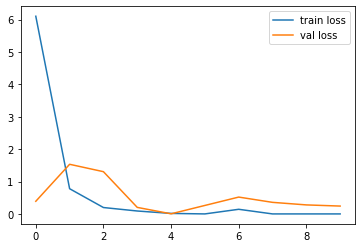

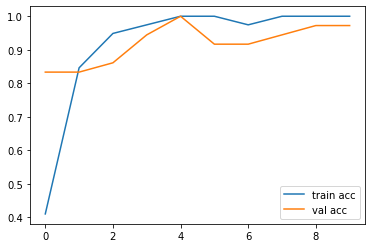

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
# save it as a h5 file


# from tensorflow.keras.models import load_model

# model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)

3/3 [==============================] - 4s 743ms/step


In [ ]:
y_pred

array([[8.86721730e-01, 1.11522727e-01, 1.97160511e-23, 1.75559602e-03],
       [9.99999940e-01, 4.40342560e-13, 9.43126454e-22, 6.96438756e-14],
       [0.00000000e+00, 9.99999940e-01, 8.63449453e-38, 5.94543471e-14],
       [1.01006226e-33, 8.58255600e-09, 3.63775403e-30, 9.99999940e-01],
       [1.99398239e-16, 1.58247985e-06, 1.60819196e-24, 9.99998391e-01],
       [1.71468559e-16, 1.41611229e-08, 5.50107656e-24, 9.99999940e-01],
       [0.00000000e+00, 9.99999940e-01, 8.76626204e-36, 5.51533515e-12],
       [9.99999940e-01, 3.22221815e-16, 5.38948261e-35, 7.40715488e-20],
       [0.00000000e+00, 6.99555835e-09, 0.00000000e+00, 9.99999940e-01],
       [4.68496560e-21, 3.19069773e-06, 2.51791294e-33, 9.99996722e-01],
       [9.99999940e-01, 5.43555062e-11, 8.13487053e-32, 2.79819112e-10],
       [1.10211336e-21, 7.85460230e-08, 9.99999821e-01, 5.12338307e-16],
       [1.75263215e-23, 1.56623510e-12, 9.99999940e-01, 1.93852620e-19],
       [9.02439126e-38, 1.54667245e-02, 4.40315869e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 1, 3, 3, 3, 1, 0, 3, 3, 0, 2, 2, 3, 2, 2, 2, 1, 3, 2, 2, 2,
       2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import os
import cv2

In [ ]:
labels = ['screwdriver', 'pliers','wrench', 'hacksaw']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

val = get_data('/content/drive/MyDrive/training')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [ ]:
y_val = []

for feature, label in val:
  y_val.append(label)

y_val = np.array(y_val)

In [ ]:

print(classification_report(y_val, y_pred, target_names = ['Screwdriver (Class 0)','Pliers (Class 1)','Wrench (Class 2)','Hacksaw (Class 3)']))

                       precision    recall  f1-score   support

Screwdriver (Class 0)       0.57      0.25      0.35        16
     Pliers (Class 1)       0.20      0.25      0.22         4
     Wrench (Class 2)       0.25      0.50      0.33         8
    Hacksaw (Class 3)       0.12      0.12      0.12         8

             accuracy                           0.28        36
            macro avg       0.29      0.28      0.26        36
         weighted avg       0.36      0.28      0.28        36

